<a href="https://colab.research.google.com/github/tirtha0809/Machine-Learning/blob/main/LandSlide_RF_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
import time

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing the dataset

In [91]:
df = pd.read_csv('/content/drive/MyDrive/LANDSLIDE/LandslideData .csv')
df.size

688104

##Taking care of missing value

In [92]:
df.dropna(inplace=True)

In [93]:
df.head()

,Index,landslide_category,landslide_size,fatality_count,Latitude,Longitude,temp-2,temp-1,temp-0,maxt-2,...,avgslope,LC_Type1_mean,LST_Day_1km_mean,NDVI_mean,NDWI_mean,aspect,elevation,precipitation_sum,slope,landslide_trigger
0,1858.0,7.0,2.0,0.0,16.92,73.59,26.3,26.5,26.2,27.7,...,27.875,9.000000,15585.75010,0.276409,0.076935,85.79104,68.0,76083.62956,12.437977,1.0
1,1141.0,6.0,2.0,4.0,30.38,78.09,26.7,27.2,25.8,28.1,...,81.375,9.000000,15080.14281,0.256626,0.161844,240.09620,828.0,49711.02632,3.715572,1.0
4,55.0,6.0,1.0,0.0,42.97,-124.01,11.8,8.3,7.8,14.7,...,88.875,1.000000,14795.41238,0.490961,0.363601,173.99826,75.0,47384.80481,11.947599,1.0
5,4000.0,6.0,2.0,2.0,37.75,-25.20,14.0,14.1,15.8,17.0,...,167.000,7.058824,14609.53463,0.396181,0.306116,89.37942,68.0,20904.96219,56.214066,1.0
6,5609.0,7.0,3.0,0.0,47.27,-122.26,11.4,11.3,10.6,14.8,...,40.000,6.764706,14744.06481,0.352804,0.292128,110.89202,40.0,28623.51198,22.222166,1.0


In [94]:
df.size

454974

In [95]:
x = df.iloc[:,1:-1].values
y= df.iloc[:,-1].values
smote= SMOTE(k_neighbors = 3)
x_smote,y_smote = smote.fit_resample(x,y)

In [96]:
print(len(y))


3991


In [97]:
print(x)

[[7.00000000e+00 2.00000000e+00 0.00000000e+00 ... 6.80000000e+01
  7.60836296e+04 1.24379770e+01]
 [6.00000000e+00 2.00000000e+00 4.00000000e+00 ... 8.28000000e+02
  4.97110263e+04 3.71557240e+00]
 [6.00000000e+00 1.00000000e+00 0.00000000e+00 ... 7.50000000e+01
  4.73848048e+04 1.19475990e+01]
 ...
 [7.00000000e+00 2.00000000e+00 0.00000000e+00 ... 9.10000000e+01
  3.59366855e+04 0.00000000e+00]
 [7.00000000e+00 2.00000000e+00 0.00000000e+00 ... 2.49000000e+02
  3.42958039e+04 1.75379300e+01]
 [6.00000000e+00 2.00000000e+00 0.00000000e+00 ... 9.90000000e+01
  2.58763367e+04 8.28910000e+00]]


In [98]:
print(y)

[ 1.  1.  1. ... 12. 12. 12.]


## Splitting the dataset into the Training set and Test set

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.30,random_state=0)

In [100]:
unique_y = np.unique(y_train)
print(unique_y)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


In [101]:
print(x_train)

[[6.00000000e+00 2.00000000e+00 3.61236320e-03 ... 2.12674887e+02
  5.71943802e+04 3.25854964e+01]
 [3.79334781e+00 1.55866956e+00 2.44133044e+00 ... 2.44984295e+02
  6.73119344e+04 5.93672065e+00]
 [6.06190370e+00 2.00000000e+00 2.81428889e+00 ... 1.56688640e+03
  1.89746645e+04 1.82006053e+01]
 ...
 [7.00000000e+00 2.00000000e+00 7.06923890e-01 ... 2.83560518e+02
  2.44250521e+04 1.31633727e+01]
 [9.58714256e+00 2.13761915e+00 0.00000000e+00 ... 3.61109719e+01
  4.89714139e+04 3.92890559e+00]
 [6.00000000e+00 2.00000000e+00 0.00000000e+00 ... 1.19000000e+02
  9.06664130e+04 2.73049600e+01]]


In [102]:
print(x_test)

[[6.00000000e+00 2.00000000e+00 4.20751312e-01 ... 1.29588189e+02
  4.94958649e+04 5.13374155e+00]
 [7.01547122e+00 2.00000000e+00 2.08917015e+01 ... 8.11998112e+02
  4.59546152e+04 3.07818105e+01]
 [7.35403157e+00 2.45134386e+00 0.00000000e+00 ... 2.13870243e+02
  7.47723757e+04 1.10232431e+00]
 ...
 [6.00000000e+00 2.00000000e+00 5.05495620e-01 ... 8.83856810e+02
  4.67618644e+04 2.73307034e+01]
 [6.00000000e+00 2.22960821e+00 0.00000000e+00 ... 1.07947688e+03
  3.69824999e+04 1.90623471e+01]
 [3.00000000e+00 2.00000000e+00 0.00000000e+00 ... 1.42700000e+03
  7.39218079e+04 7.43369200e+00]]


In [103]:
print(y_train)

[ 4. 10. 11. ...  4.  5.  9.]


In [104]:
print(y_test)

[11.  6.  4. ...  1.  4.  3.]


## Feature Scaling

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [106]:
print(x_train)

[[-0.40479579 -0.49349711 -0.16715248 ... -0.63820108  0.48274701
   1.73312154]
 [-2.37324414 -1.45847871  0.17029236 ... -0.58143944  0.88452009
  -1.04744832]
 [-0.34957447 -0.49349711  0.2219197  ...  1.7408975  -1.03497679
   0.23218225]
 ...
 [ 0.48725614 -0.49349711 -0.06979551 ... -0.51366817 -0.81853921
  -0.29340952]
 [ 2.79512165 -0.19258891 -0.16765253 ... -0.94839115  0.15620896
  -1.2569465 ]
 [-0.40479579 -0.49349711 -0.16765253 ... -0.80277049  1.81193799
   1.18214312]]


In [107]:
print(x_test)

[[-0.40479579 -0.49349711 -0.10940939 ... -0.78416901  0.17703517
  -1.13123226]
 [ 0.50105727 -0.49349711  2.72431311 ...  0.41469872  0.03641039
   1.54492249]
 [ 0.80307069  0.49337913 -0.16765253 ... -0.63610106  1.18077791
  -1.55187587]
 ...
 [-0.40479579 -0.49349711 -0.09767853 ...  0.54094113  0.06846665
   1.18482922]
 [-0.40479579  0.0085478  -0.16765253 ...  0.88460934 -0.31987675
   0.32209757]
 [-3.08095158 -0.49349711 -0.16765253 ...  1.49514302  1.14700144
  -0.89125227]]


## Training the Random forest model on the Training set

In [108]:
start = time.time()

In [109]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 1)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [110]:
end = time.time()

In [111]:
print("The time of execution of above program is :", (end-start)*1000)

The time of execution of above program is : 52295.14002799988


## Predicting the Test set results

In [112]:

start = time.time()


In [113]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[11. 11.]
 [ 6.  6.]
 [ 4.  4.]
 ...
 [ 1.  1.]
 [ 4.  4.]
 [ 3.  3.]]


In [114]:
end = time.time()
print((end - start) *1000)


210.99853515625


##Making the Confusion Matrix

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accu=accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

df = pd.DataFrame()
x = []
x.append(accu)
df["Accuracy"] = x
df["Precision"] = precision
df["Recall"] = recall
df["F1 Score"] = f1
df.to_csv('/content/drive/MyDrive/Colab Notebooks/file1.csv')

[[675   0   1   0   1   0   0   0   0   0   0   0]
 [  0 617  19   0   1   0   3   4   0  16   0   5]
 [  6  53 385   3   2   2   2  13   1 173   2  41]
 [  0   0   1 652   0   0   0   0   0   0   0   0]
 [  0   0   0   0 671   0   0   0   0   0   0   0]
 [  0   0   0   0   0 693   0   0   0   0   0   0]
 [  0   1   0   0   0   0 663   0   0   0   0   0]
 [  0   1   1   0   0   0   0 645   0   0   0   0]
 [  0   0   0   0   0   0   0   0 675   0   0   0]
 [  1  30 121   5   2   1   3   7   2 442   2  32]
 [  0   1   0   0   0   0   0   0   0   0 692   0]
 [  1   8  15   1   0   0   0   2   1  16   2 610]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       677
         2.0       0.87      0.93      0.90       665
         3.0       0.71      0.56      0.63       683
         4.0       0.99      1.00      0.99       653
         5.0       0.99      1.00      1.00       671
         6.0       1.00      1.00      

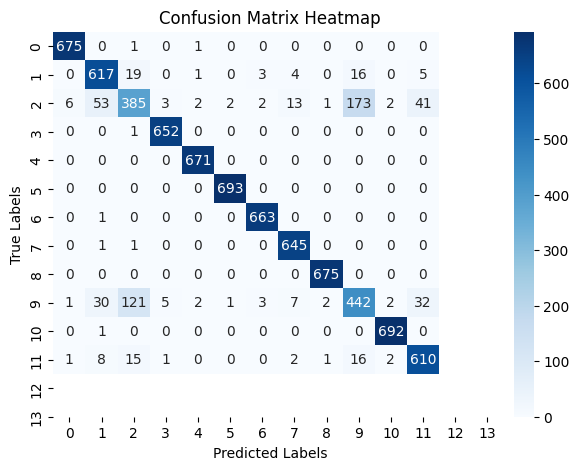

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated the confusion matrix 'cm' for 14 classes

# Plot the confusion matrix heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(14), yticklabels=range(14))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [117]:
y_pred1 = classifier.predict(x_train)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_train.reshape(len(y_train),1)),1))

[[ 4.  4.]
 [10. 10.]
 [11. 11.]
 ...
 [ 4.  4.]
 [ 5.  5.]
 [ 9.  9.]]
